In [1]:
import sys

sys.path.append("..")  # Adds higher directory to python modules path.
import os
import numpy as np
import polars as pl
from src import RASPRoutines
from src import AnalysisFunctions
from src import CoincidenceFunctions
import matplotlib.pyplot as plt
A_F = AnalysisFunctions.Analysis_Functions()
C_F = CoincidenceFunctions.Coincidence_Functions()

RASP = RASPRoutines.RASP_Routines()

In [82]:
""" the command below will re-run colocalisation analysis on already analysed data

analysis_file: an analysis file .csv

threshold: a photon threshold

protein_string: a string for images with protein in

cell_string: a string for cellular images

"""

analysis_folder = r"S:\ASAP_Imaging_Data\Main_Survey\20241105_oligomers_in_cells\caudate\neurons\PD_analysis"
analysis_file = os.path.abspath(
    r"S:\ASAP_Imaging_Data\Main_Survey\20241105_oligomers_in_cells\caudate\neurons\PD_analysis\spot_analysis_0_abovephotonthreshold.csv"
)  # example file, replace as you wish. Always input as the absolute path of a raw string
threshold = 0.0
protein_string = "C1"
cell_string = "C0"
imtype = '.tif'
lower_cell_size_threshold = 2000.0
analysis_data = pl.read_csv(analysis_file)
z_project_first = [True, True]

cell_punctum_analysis_file = r"S:\ASAP_Imaging_Data\Main_Survey\20241105_oligomers_in_cells\caudate\neurons\PD_analysis\single_cell_coincidence_mincellsize_2000_photonthreshold_0p0_photons_combined_threshold_percentile_0_k_4_outliersremoved_abovethreshold.csv"
cell_punctum_analysis = pl.read_csv(cell_punctum_analysis_file)
cell_punctum_analysis = cell_punctum_analysis.filter(pl.col("puncta_cell_likelihood") != np.NAN)

In [83]:
np.mean(cell_punctum_analysis['n_puncta_in_cell'].to_numpy())

63.95

In [3]:
image_filenames = np.unique(cell_punctum_analysis["image_filename"].to_numpy())

In [4]:
n_cells_per_image = np.zeros(len(image_filenames))
for i, filename in enumerate(image_filenames):
    n_cells_per_image[i] = len(cell_punctum_analysis.filter(pl.col("image_filename") == filename)["area/pixels"].to_numpy())

In [18]:
n_cells_per_image

array([1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 5.,
       2., 1., 2., 1., 2., 2., 4., 1., 1., 1., 1., 1., 1., 1., 1.])

0


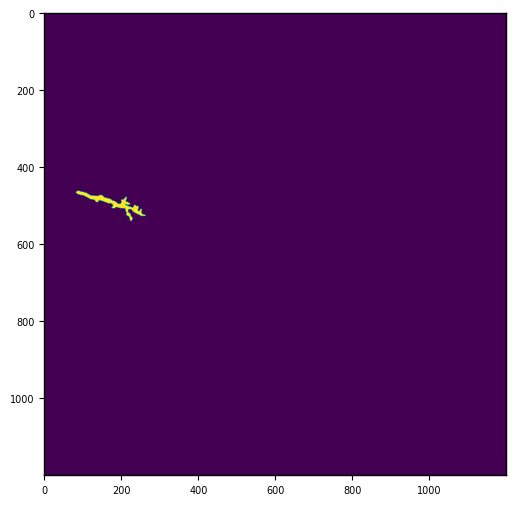

1


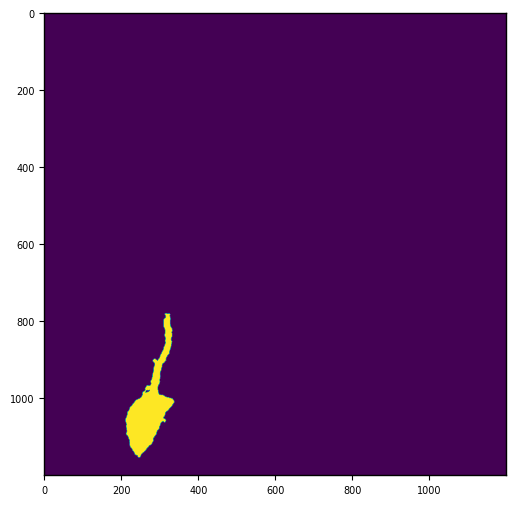

2


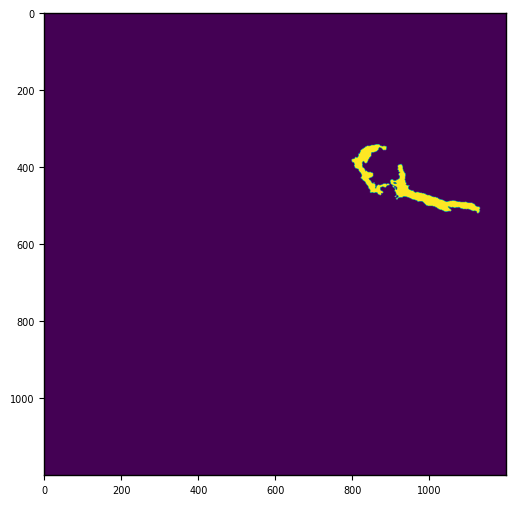

3


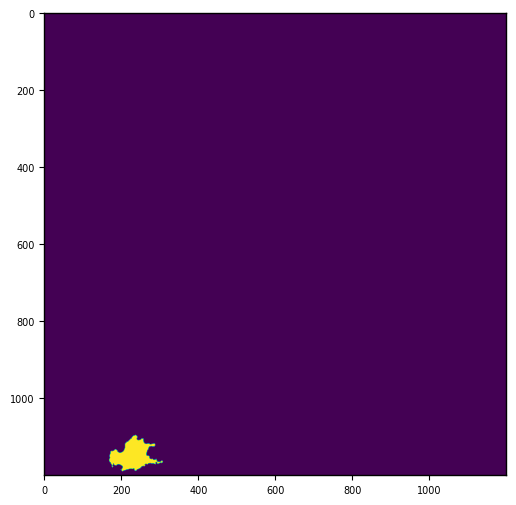

4


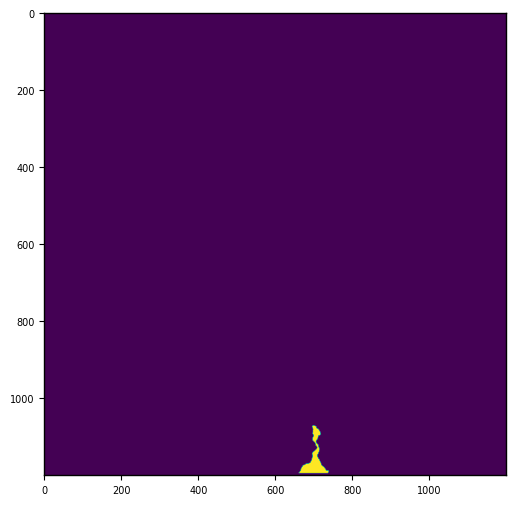

5


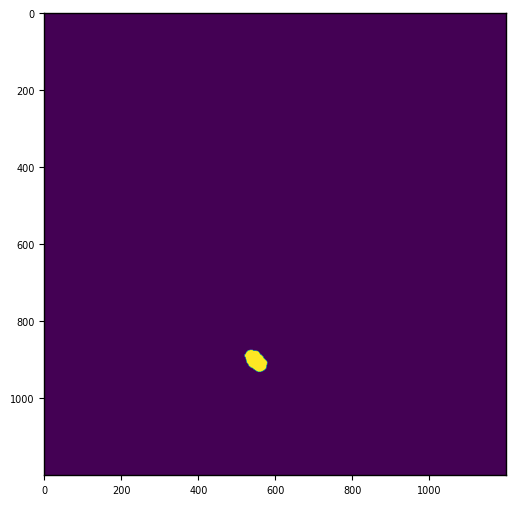

6


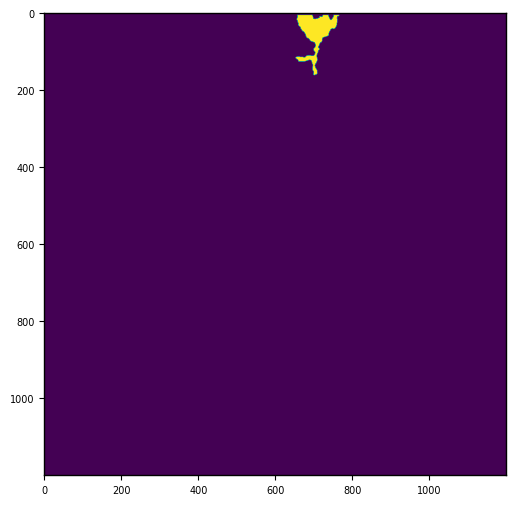

7


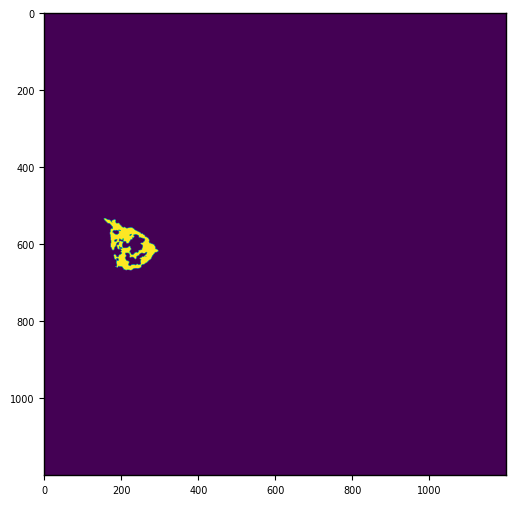

8


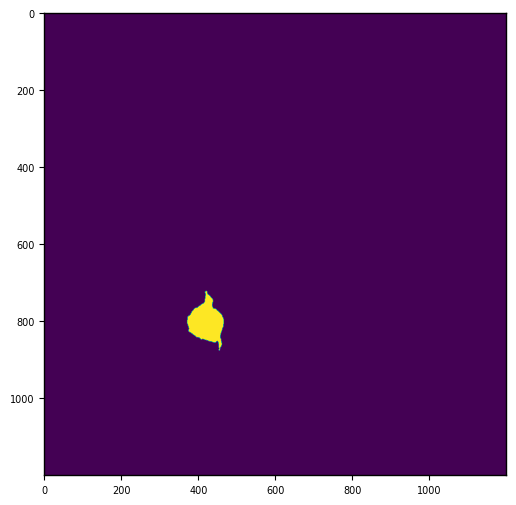

9


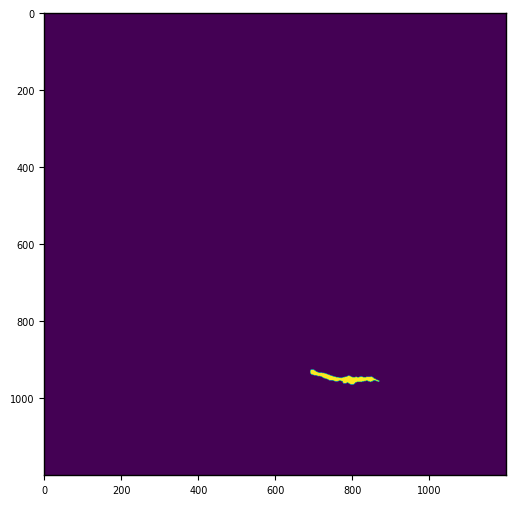

10


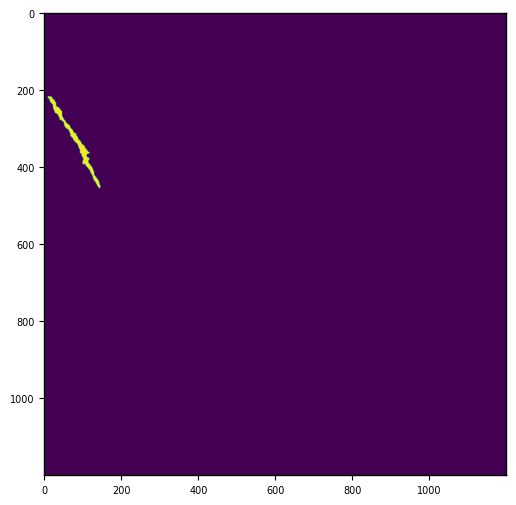

11


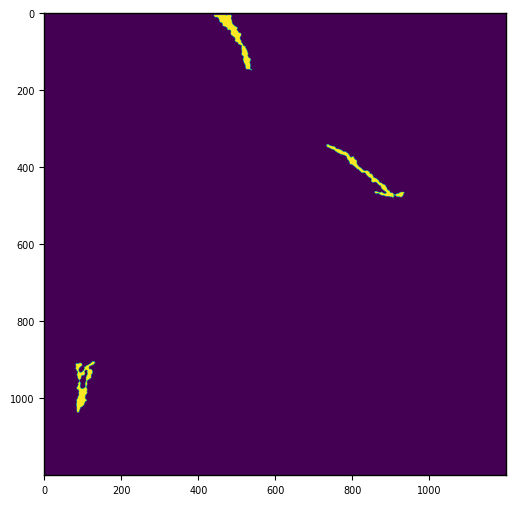

12


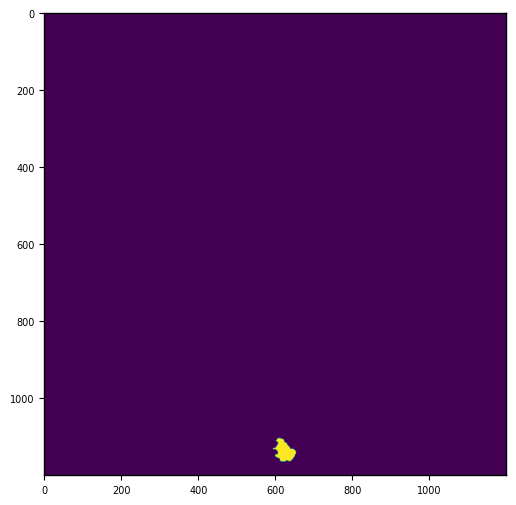

13


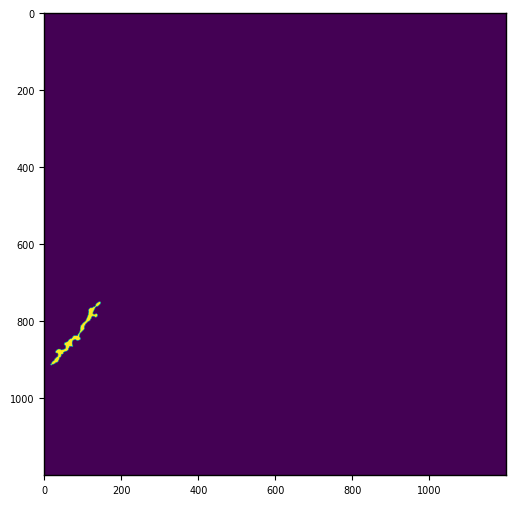

14


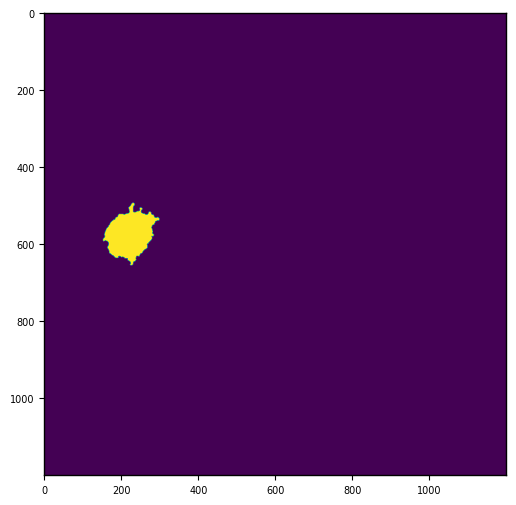

15


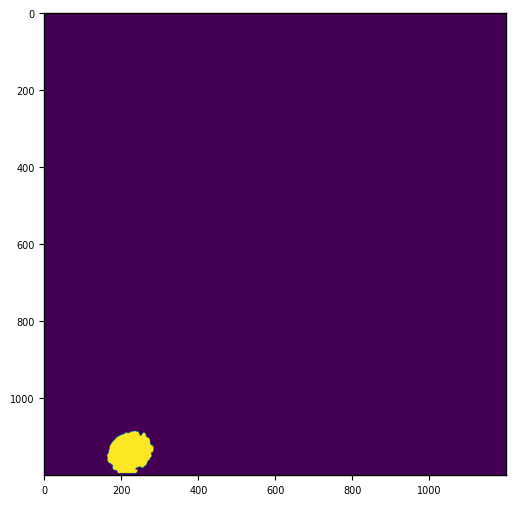

16


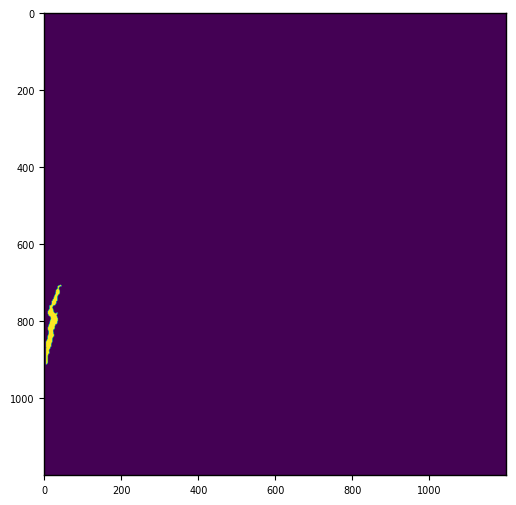

17


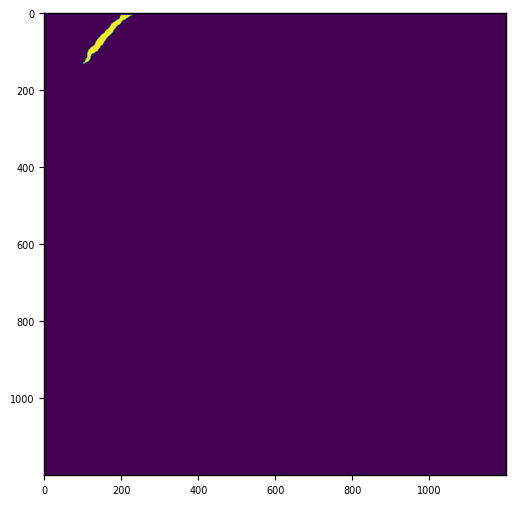

18


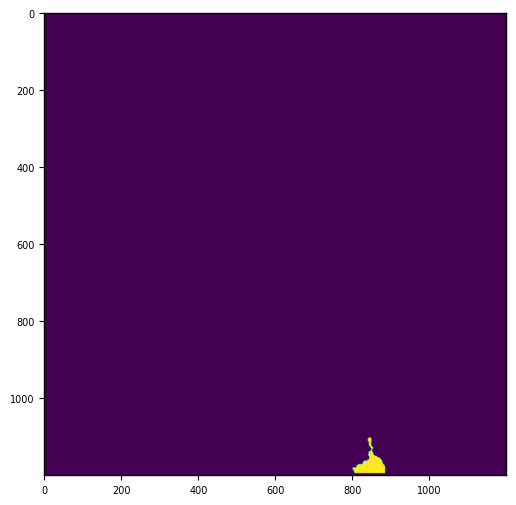

19


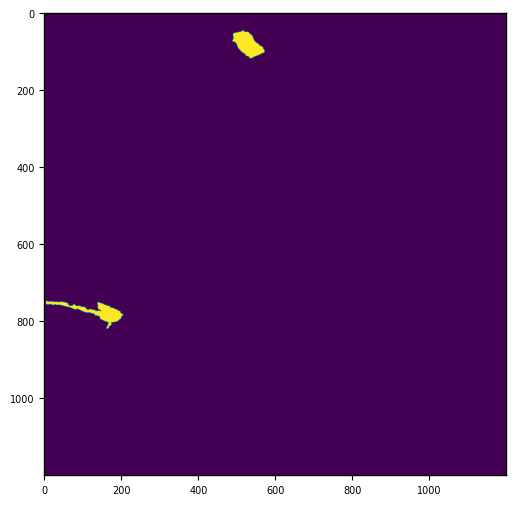

20


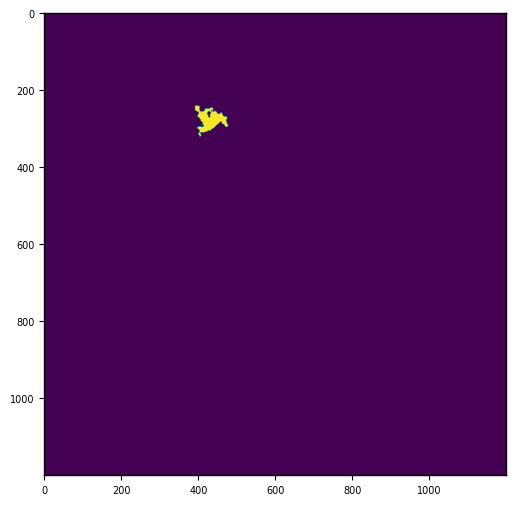

21


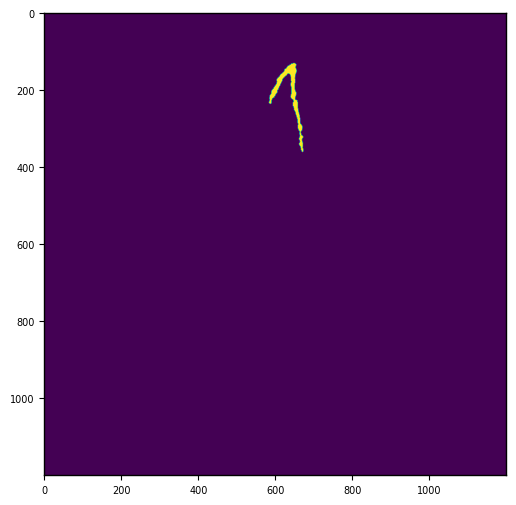

22


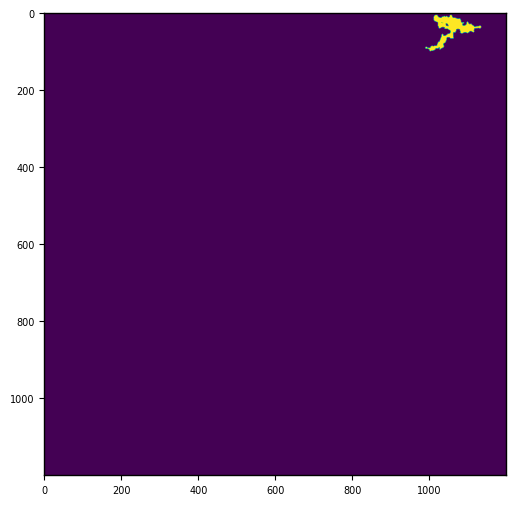

23


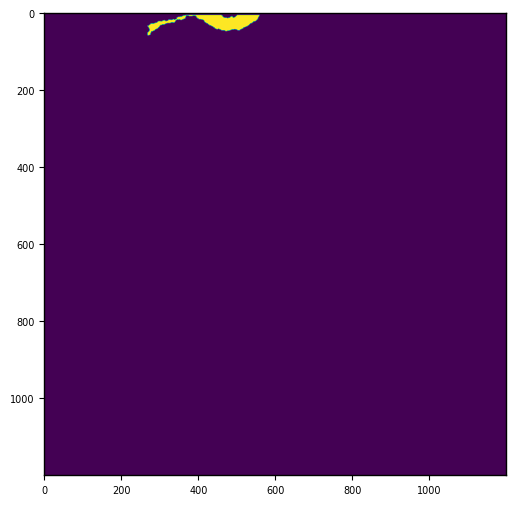

24


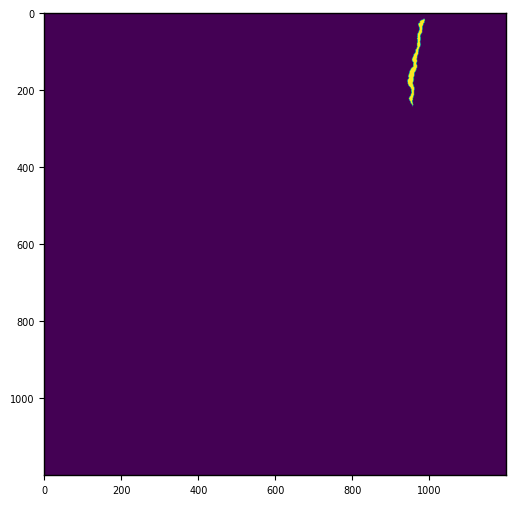

25


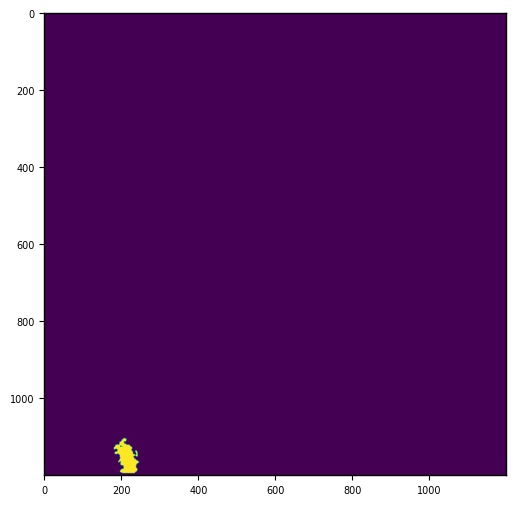

26


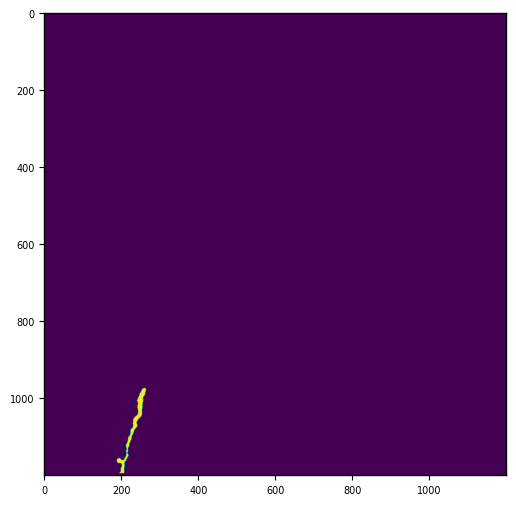

27


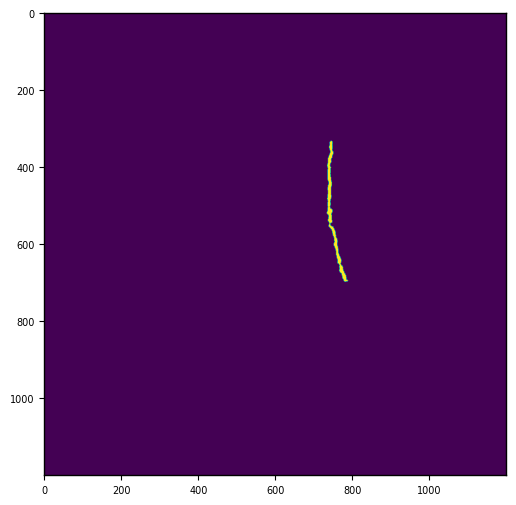

28


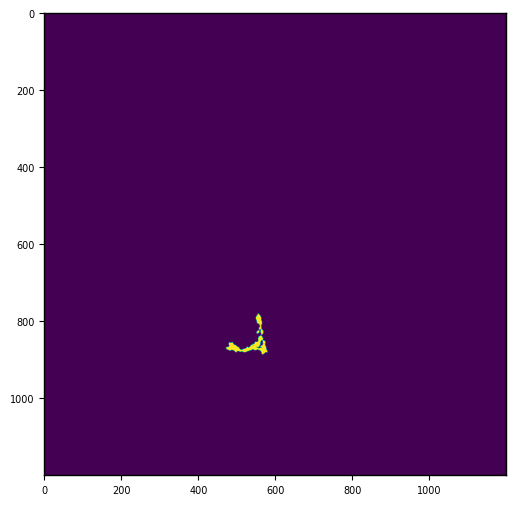

29


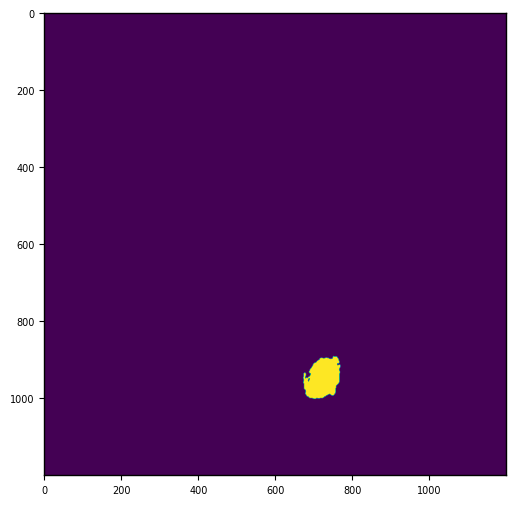

30


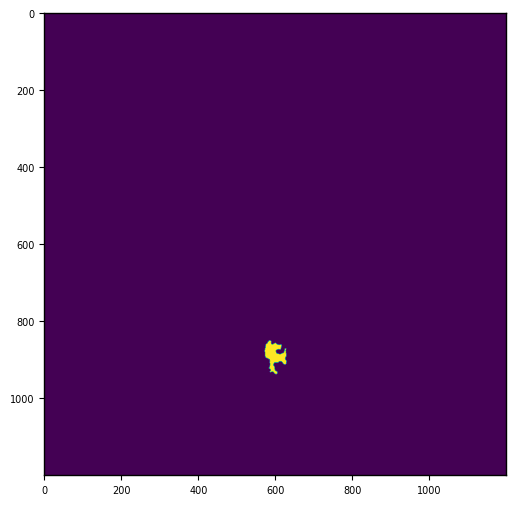

31


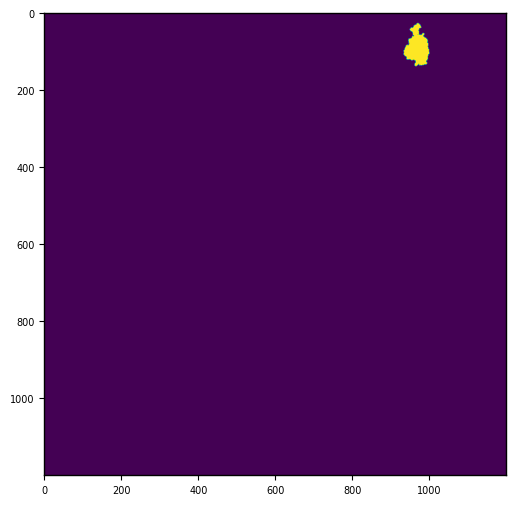

32


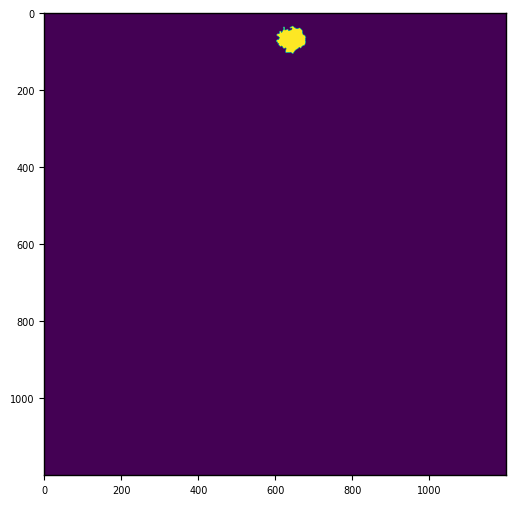

33


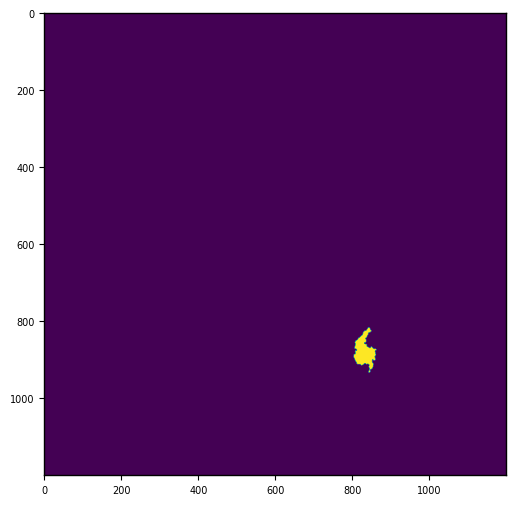

34


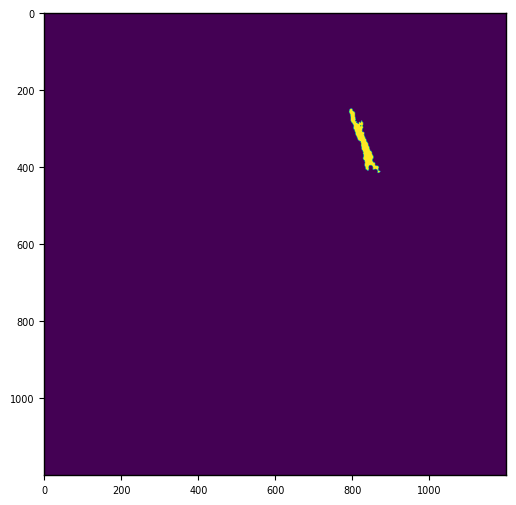

35


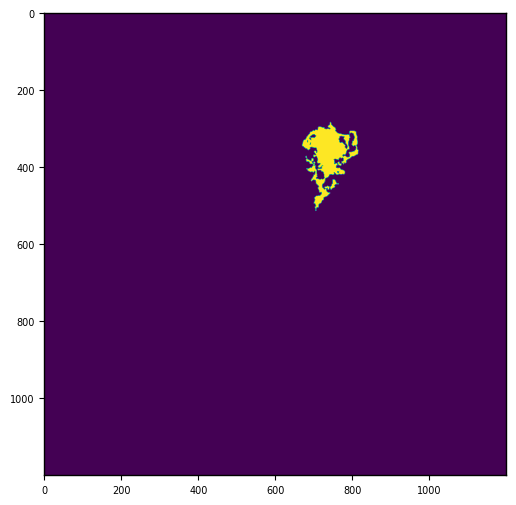

36


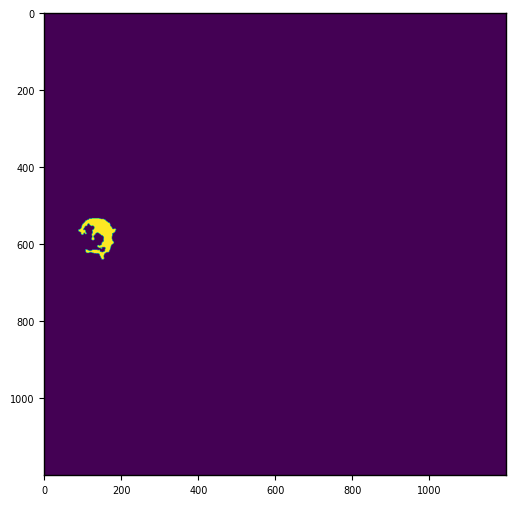

37


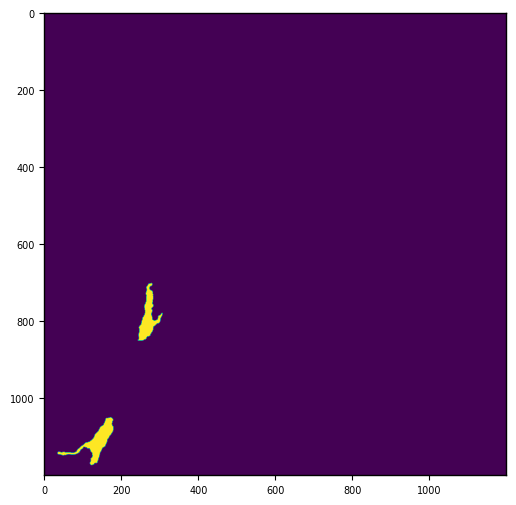

38


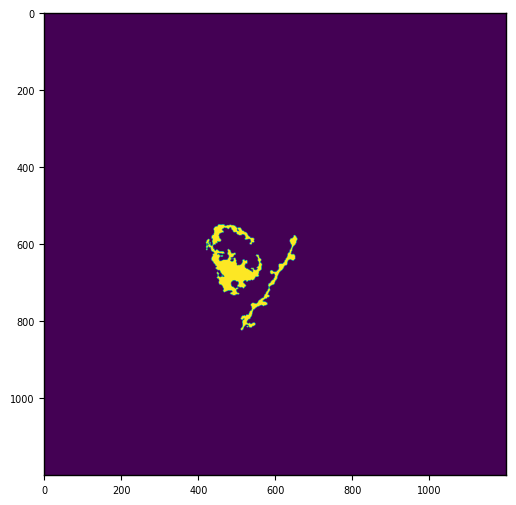

39


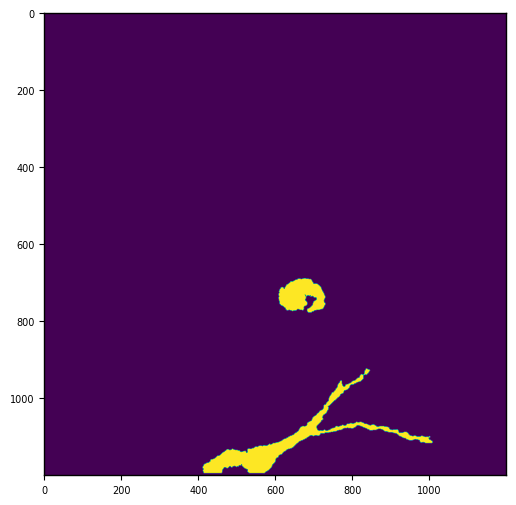

40


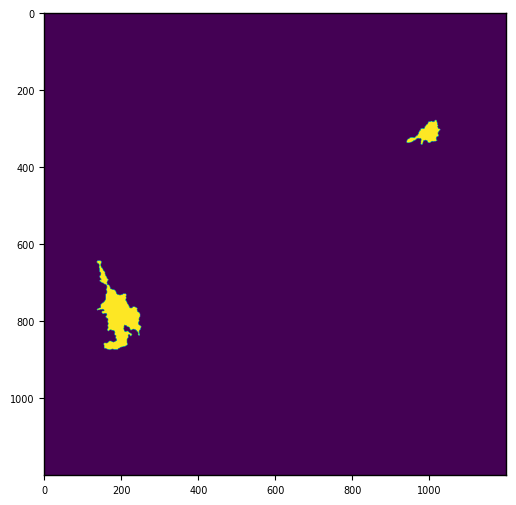

41


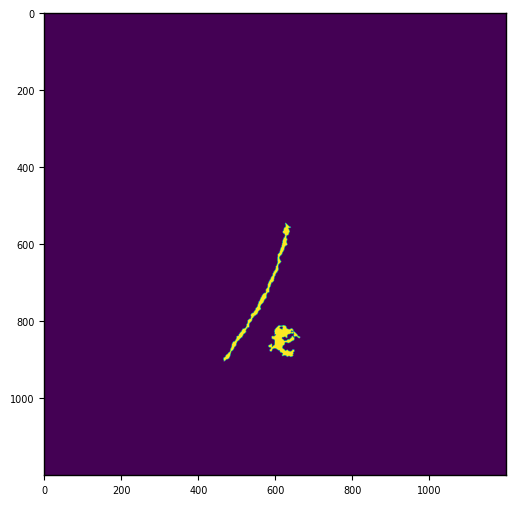

42


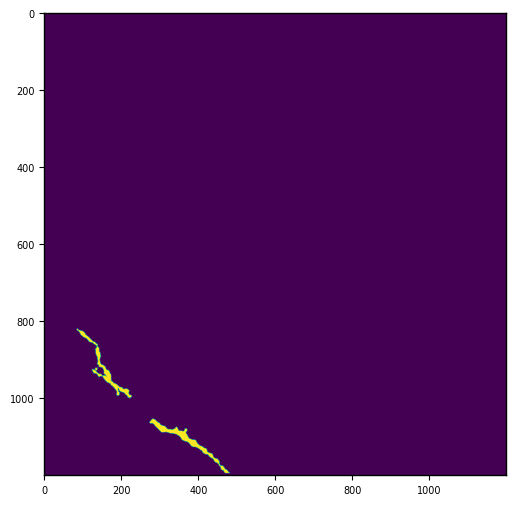

43


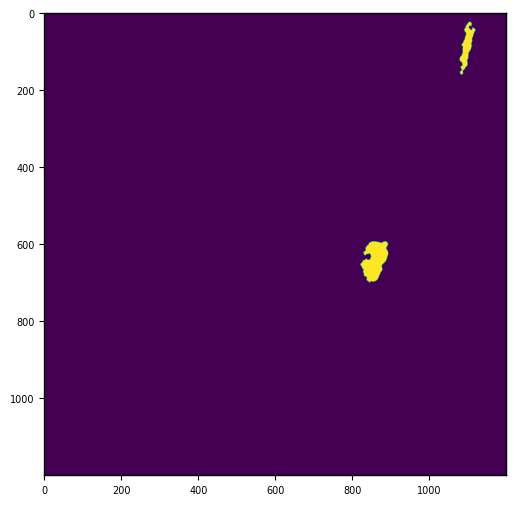

44


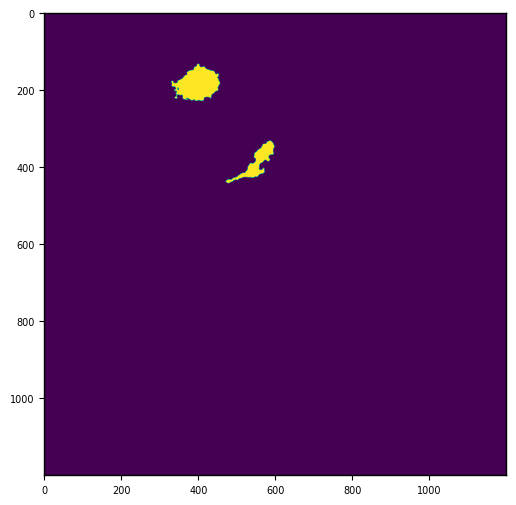

45


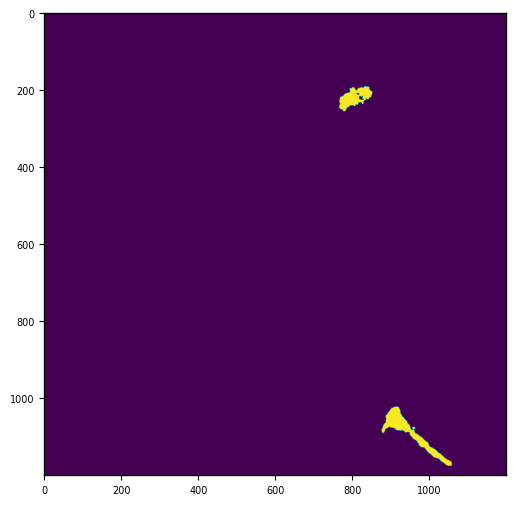

46


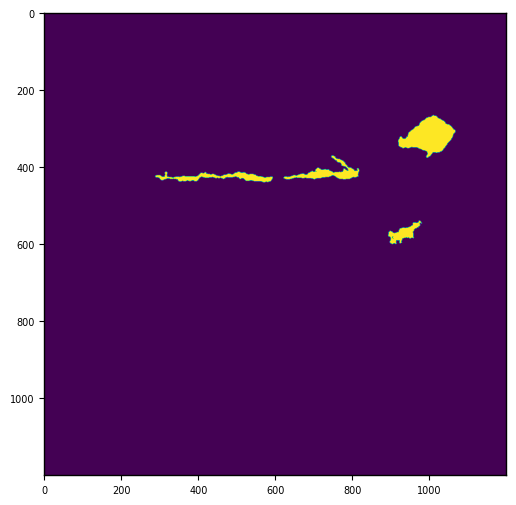

47


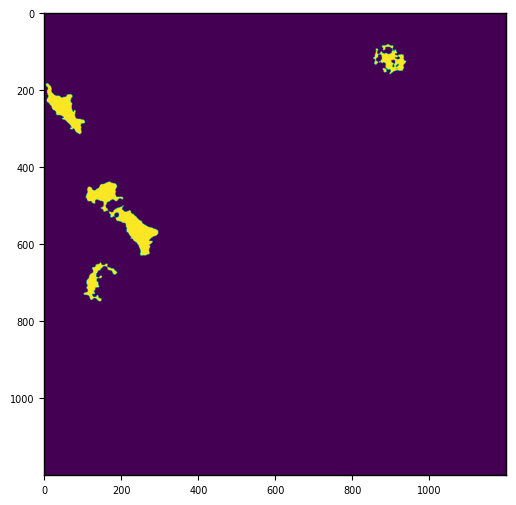

48


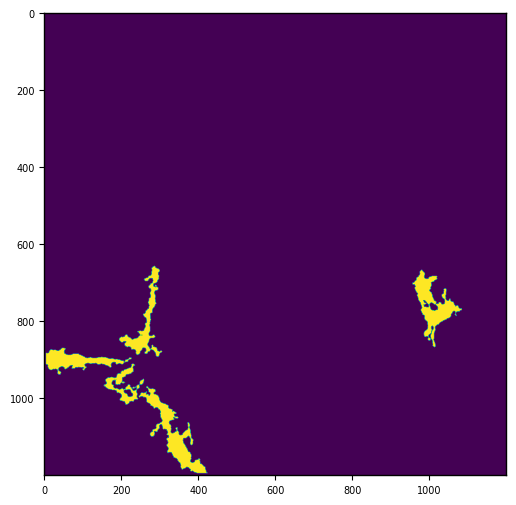

In [70]:
# we can now use various plotting commands to select a z-slice and plot the cell mask vs number of puncta
import polars as pl
from src import IOFunctions

IO = IOFunctions.IO_Functions()

from src import AnalysisFunctions

A_F = AnalysisFunctions.Analysis_Functions()
import os

for i in np.arange(len(n_cells_per_image)):
    cell_file = np.argsort(n_cells_per_image)[i]
    file = image_filenames[cell_file]  # we take a file we're interested in
    # now find the corresponding cell mask
    mask_file = os.path.join(
        analysis_folder,
        str(
            os.path.split(file)[-1].split(imtype)[0].split(protein_string)[0]
            + cell_string
            + "_cellMask.tiff"
        ),
    )
    
    # and the corresponding raw cell data
    raw_cell_file = str(file.split(imtype)[0].split(protein_string)[0]+cell_string+imtype)
    cell_mask = IO.read_tiff(mask_file)
    cell_image = IO.read_tiff_tophotons(raw_cell_file)
    puncta_image = IO.read_tiff_tophotons(file)
    puncta_values = analysis_data.filter(pl.col('image_filename') == file)
    oned_cell_mask, pil, centroids, areas = A_F.threshold_cell_areas(
        cell_mask,
        lower_cell_size_threshold=lower_cell_size_threshold,
        z_project=[True, True],
    )
    oned_puncta_image = np.sum(puncta_image, axis=-1)
    oned_cell_image = np.sum(cell_image, axis=-1)
    print(i)
    plt.imshow(oned_cell_mask)
    plt.show(block=False)

In [71]:
    cell_file = np.argsort(n_cells_per_image)[14]
    file = image_filenames[cell_file]  # we take a file we're interested in
    # now find the corresponding cell mask
    mask_file = os.path.join(
        analysis_folder,
        str(
            os.path.split(file)[-1].split(imtype)[0].split(protein_string)[0]
            + cell_string
            + "_cellMask.tiff"
        ),
    )
    
    # and the corresponding raw cell data
    raw_cell_file = str(file.split(imtype)[0].split(protein_string)[0]+cell_string+imtype)
    cell_mask = IO.read_tiff(mask_file)
    cell_image = IO.read_tiff_tophotons(raw_cell_file)
    puncta_image = IO.read_tiff_tophotons(file)
    puncta_values = analysis_data.filter(pl.col('image_filename') == file)
    oned_cell_mask, pil, centroids, areas = A_F.threshold_cell_areas(
        cell_mask,
        lower_cell_size_threshold=lower_cell_size_threshold,
        z_project=[True, True],
    )
    oned_puncta_image = np.sum(puncta_image, axis=-1)
    oned_cell_image = np.sum(cell_image, axis=-1)

In [72]:
z_planes = np.unique(puncta_values['z'])
n_spots_per_plane = np.zeros(len(np.unique(puncta_values['z'])))
for i, z in enumerate(np.unique(puncta_values['z'])):
    n_spots_per_plane[i] = len(puncta_values.filter(pl.col("z") == z)["sum_intensity_in_photons"].to_numpy())

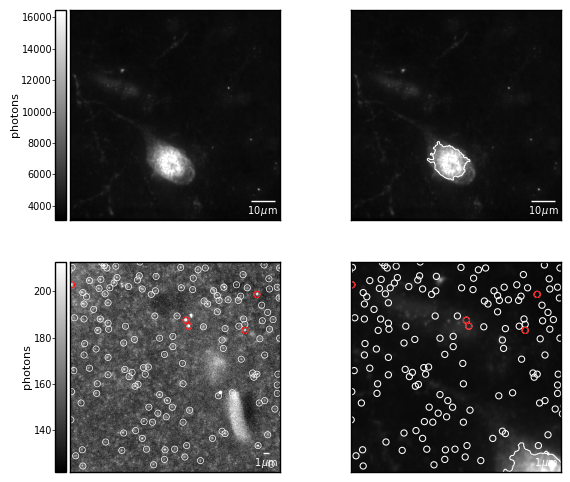

In [77]:
from src import PlottingFunctions

plotter = PlottingFunctions.Plotter()
fig, axs = plotter.two_column_plot(ncolumns=2, nrows=2, widthratio=[1,1], heightratio=[1,1])

axs[0] = plotter.image_plot(
    axs=axs[0],
    data=oned_cell_image.T,
    plotmask=False,
    mask=oned_cell_mask.T,
    maskcolor="white",
)

axs[1] = plotter.image_plot(
    axs=axs[1],
    data=oned_cell_image.T,
    plotmask=True,
    mask=oned_cell_mask.T,
    maskcolor="white",
    cbar="off"
)

axs[0].set_xlim([200, 1000])
axs[1].set_xlim([200, 1000])
axs[0].set_ylim([0, 800])
axs[1].set_ylim([0, 800])


image_size = (1200,1200)
size_display = 350
z_plane = int(z_planes[np.argmax(n_spots_per_plane)])

spots = puncta_values.filter(pl.col('z') == z_plane)
x_spots = spots['x'].to_numpy()
y_spots = spots['y'].to_numpy()
xmin = int(image_size[0]/2 - size_display)
xmax = int(image_size[0]/2)
axs[2] = plotter.image_scatter_plot(
    axs=axs[2],
    data=puncta_image[:,:,z_plane-1],
    xdata=x_spots+1,
    ydata=y_spots,
    scalebarsize=1000,
    scalebarlabel=r"1$\,\mu$m",
    scattercolor='white',
    lws=0.5,
)

bright_spots = spots.filter(pl.col('sum_intensity_in_photons') > 525.1)
axs[2].scatter(bright_spots['x'].to_numpy()+1, bright_spots['y'].to_numpy(), lw=0.75, edgecolor='red', s=20, facecolors="None")

axs[2].set_xlim([xmin, xmax])
axs[2].set_ylim([xmin, xmax])

x = bright_spots['x'].to_numpy()
y = bright_spots['y'].to_numpy()

centroids = np.asarray(np.vstack([x, y]), dtype=int).T
mask_indices = A_F.generate_indices(oned_cell_mask, image_size, is_mask=True)
spot_indices = A_F.generate_indices(centroids, image_size)
n_spots = len(spot_indices)
spot_indices = C_F._apply_blur(spot_indices, image_size, 1)
raw_colocalisation = C_F.test_spot_spot_overlap(
                spot_indices, mask_indices, n_spots, raw=True
            )
bright_spots_in_cells_x = bright_spots['x'].to_numpy()[raw_colocalisation]
bright_spots_in_cells_y = bright_spots['y'].to_numpy()[raw_colocalisation]

x = spots['x'].to_numpy()
y = spots['y'].to_numpy()

centroids = np.asarray(np.vstack([x, y]), dtype=int).T
mask_indices = A_F.generate_indices(oned_cell_mask, image_size, is_mask=True)
spot_indices = A_F.generate_indices(centroids, image_size)
n_spots = len(spot_indices)
spot_indices = C_F._apply_blur(spot_indices, image_size, 1)
raw_colocalisation = C_F.test_spot_spot_overlap(
                spot_indices, mask_indices, n_spots, raw=True
            )

spots_in_cells_x = spots['x'].to_numpy()[raw_colocalisation]
spots_in_cells_y = spots['y'].to_numpy()[raw_colocalisation]

axs[3].scatter(spots_in_cells_x+1, spots_in_cells_y, lw=0.75, edgecolor='white', s=20, facecolors="white")
axs[3].scatter(x_spots+1, y_spots, lw=0.75, edgecolor='white', s=20, facecolors="None")
axs[3].scatter(bright_spots_in_cells_x+1, bright_spots_in_cells_y, lw=0.75, edgecolor='red', s=20, facecolors="red")

axs[3] = plotter.image_scatter_plot(
    axs=axs[3],
    data=oned_cell_image.T,
    xdata=bright_spots['x'].to_numpy()+1,
    ydata=bright_spots['y'].to_numpy(),
    scattercolor='red',
    lws=0.75,
    plotmask=True,
    mask=oned_cell_mask.T,
    maskcolor="white",
    scalebarsize=1000,
    scalebarlabel=r"1$\,\mu$m",
    cbar="off"
)


axs[3].set_xlim([xmin, xmax])
axs[3].set_ylim([xmin, xmax])

folder = r"C:\Users\jsb92\Cambridge University Dropbox\Joseph Beckwith\Chemistry\Lee\Papers\ASAP_Main\Figure_3"
plt.savefig(os.path.join(folder, 'Example_Neurons_Identification_zoomed.svg'), dpi=600)
plt.show()
#plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from src import PlottingFunctions

plotter = PlottingFunctions.Plotter()

fig, axs = plotter.two_column_plot(
    ncolumns=3, nrows=2, widthratio=[1, 1, 1], heightratio=[1, 1]
)

axs[0, 0] = plotter.image_scatter_plot(
    axs=axs[0, 0],
    xdata=puncta["x"],
    ydata=puncta["y"],
    data=cell_mask[:, :, z_plane - 1],
    cbarlabel=r"cell mask",
    s=0.01,
    lws=0.25,
)

axs[0, 1] = plotter.scatter_plot(
    axs=axs[0, 1],
    x=analysis["area/pixels"].to_numpy() * (0.11**2),
    y=analysis[:, 5].to_numpy(),
    s=2,
    facecolor="red",
    edgecolor=None,
    label=r"$n$ puncta > 1000 photons",
)
axs[0, 1] = plotter.scatter_plot(
    axs=axs[0, 1],
    x=analysis["area/pixels"].to_numpy() * (0.11**2),
    y=analysis[:, 4].to_numpy(),
    s=2,
    facecolor="black",
    edgecolor=None,
    label=r"$n$ puncta <= 1000 photons",
    alpha=0.5,
    xaxislabel=r"cell area ($\mu$m$^2$)",
    yaxislabel="number of puncta",
)
axs[0, 1].legend(loc="upper right", fontsize=6)
xdiff = np.diff(axs[0, 1].get_xlim())[0]
ydiff = np.diff(axs[0, 1].get_ylim())[0]
axs[0, 1].set_aspect(0.9 * (xdiff / ydiff), adjustable="box")

y = analysis["n_puncta_in_cell_ratio_aboveandbelow"].to_numpy()
inds = np.isfinite(y)
y = y[inds]
x = analysis["area/pixels"].to_numpy()[inds] * (0.11**2)
axs[0, 2] = plotter.scatter_plot(
    axs=axs[0, 2],
    x=x,
    y=y,
    s=5,
    facecolor="red",
    edgecolor=None,
    yaxislabel="ratio of bright/dim puncta",
    xaxislabel=r"cell area ($\mu$m$^2$)",
)
axs[0, 2].set_ylim([0, 1.05])
xdiff = np.diff(axs[0, 1].get_xlim())[0]
axs[0, 2].set_aspect(0.9 * (xdiff / 1.05), adjustable="box")

axs[1, 0] = plotter.image_plot(
    axs=axs[1, 0], data=cell_mask_toplot_AT, cbarlabel=r"$n$ puncta > 1000 photons"
)
axs[1, 1] = plotter.image_plot(
    axs=axs[1, 1], data=cell_mask_toplot_UT, cbarlabel=r"$n$ puncta <= 1000 photons"
)
axs[1, 2] = plotter.image_plot(
    axs=axs[1, 2], data=cell_mask_toplot_R, cbarlabel=r"ratio of bright/dim puncta"
)

plt.tight_layout(h_pad=-15)

plt.show()